## Observations and Insights 

In [145]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

from scipy.stats import linregress
from matplotlib.pyplot import figure




# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.DataFrame(pd.merge(mouse_metadata, study_results, how ="outer", on=["Mouse ID"]))

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [146]:
# Description of combined data 
merged_data.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [147]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].unique()

total_mice = len(unique_mice)

total_mice

249

In [148]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print("Duplicate mice by ID:" + duplicate_mice)

['Duplicate mice by ID:g989']


In [149]:
# Optional: Get all the data for the duplicate mouse ID. 
data_duplicated_mice = merged_data.loc[merged_data["Mouse ID"]=="g989"]
data_duplicated_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [150]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [151]:
# Checking the number of mice in the clean dataframe.
clean_mice = clean_data["Mouse ID"].value_counts()
clean_num_mice=len(clean_mice)
clean_num_mice

248

## Summary Statistics

In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_clean_data = clean_data.groupby(["Drug Regimen"])
mean_drug = grouped_clean_data.mean()["Tumor Volume (mm3)"]
median_drug = grouped_clean_data.median()["Tumor Volume (mm3)"]
var_drug = grouped_clean_data.var()["Tumor Volume (mm3)"]
sd_drug = grouped_clean_data.std()["Tumor Volume (mm3)"]
sem_drug = grouped_clean_data.sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({
    "Mean Tumor Volume (mm3)": mean_drug, 
    "Median Tumor Volume (mm3)": median_drug, 
    "Tumor Volume (mm3) Variance": var_drug, 
    "Tumor Volume (mm3) Standard Deviation": sd_drug,
    "Tumor Volume (mm3) SEM": sem_drug
})

summary_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
single_line_data = clean_data.groupby("Drug Regimen")
stats_summary_table = single_line_data.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
stats_summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


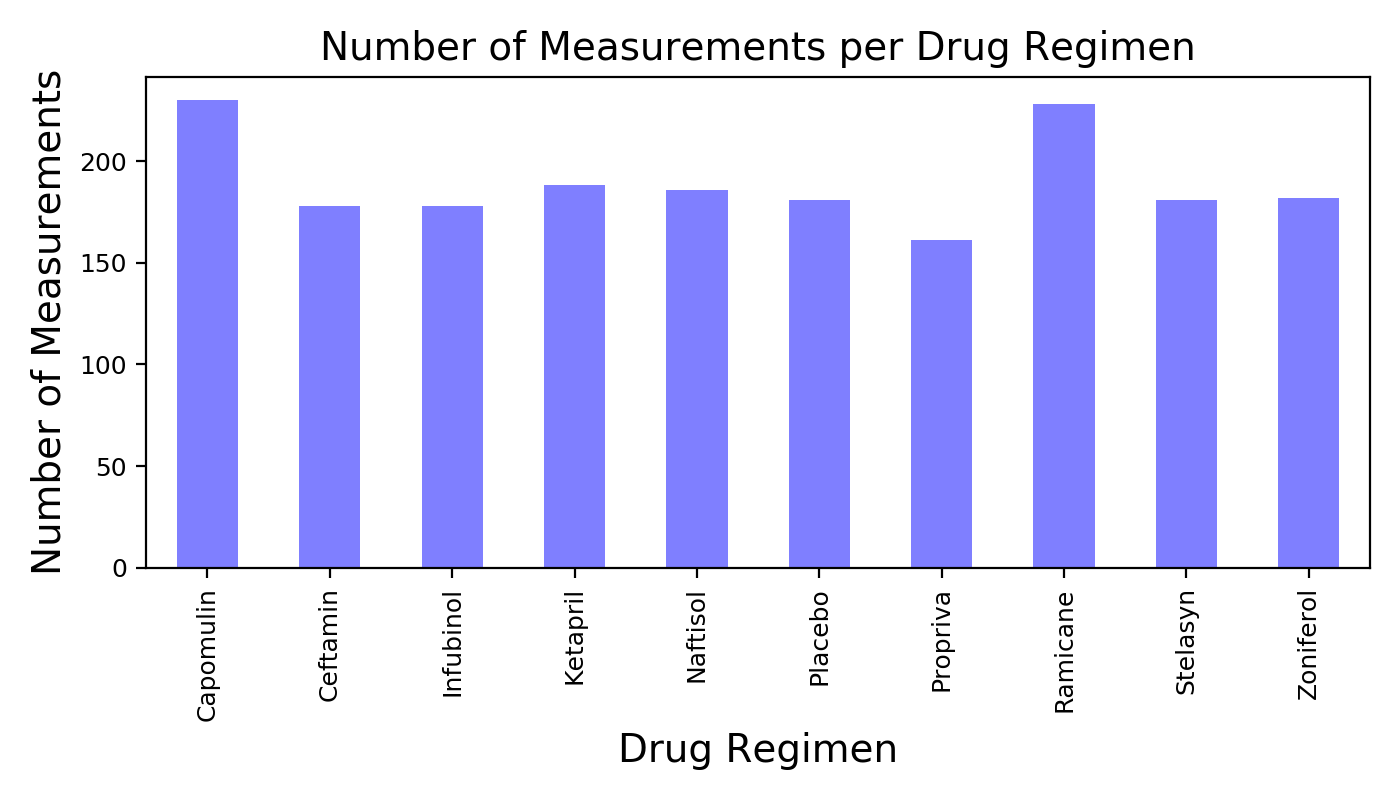

In [154]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_regimen = merged_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
count_regimen

bar_plot = count_regimen.plot.bar(figsize = (7,4), color = "b", alpha=0.5, align="center", fontsize = 9)
plt.xlabel("Drug Regimen", fontsize =14)
plt.ylabel("Number of Measurements", fontsize=14)
plt.title("Number of Measurements per Drug Regimen", fontsize=14)

plt.tight_layout()

bar_plot

<IPython.core.display.Javascript object>


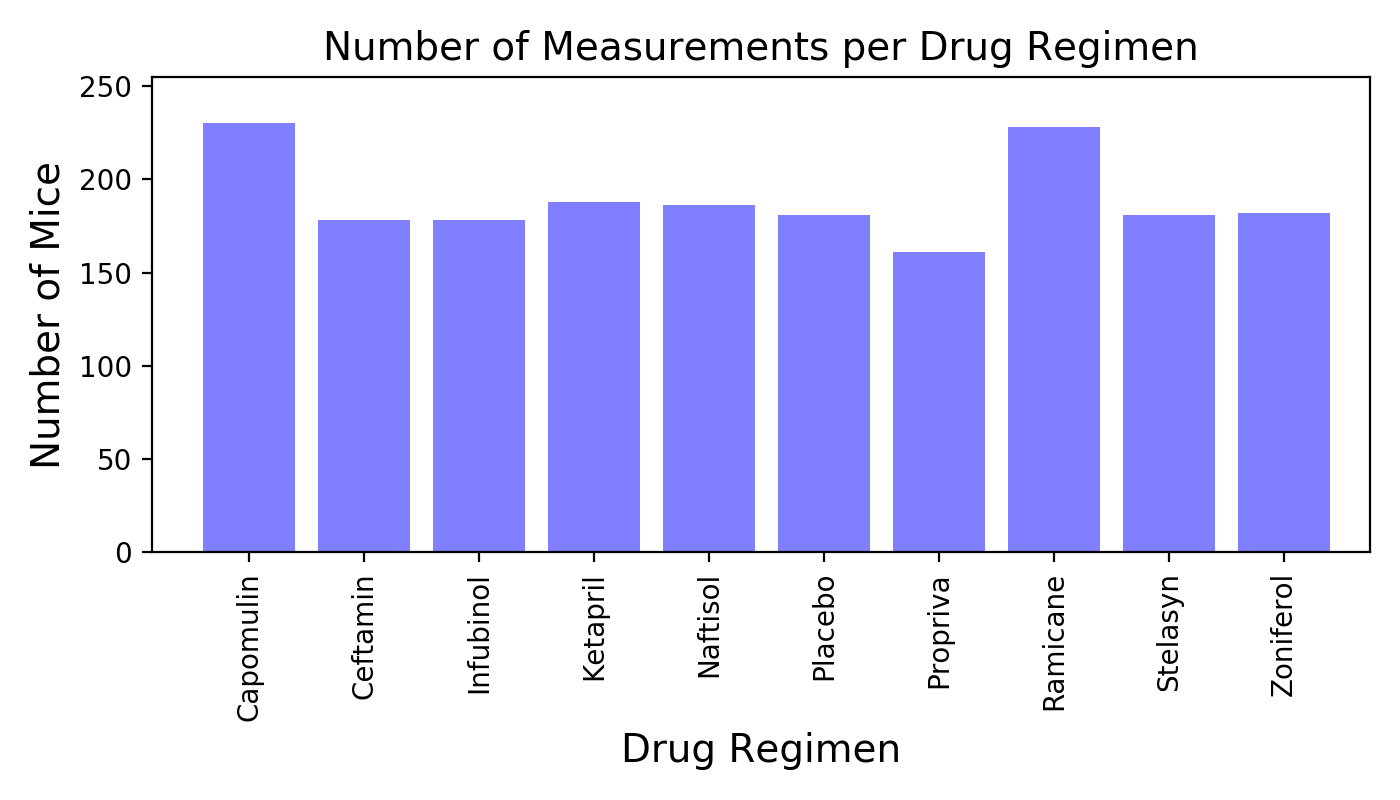

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements_list = (merged_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()


x_axis = np.arange(len(count_regimen))

fig1, ax1 = plt.subplots(figsize=(7, 4))
plt.bar(x_axis, measurements_list, color="b", alpha=0.5, align="center")

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")

plt.xlim(-.85, len(x_axis)-0.25)

plt.ylim(0, max(measurements_list)+ 25)

plt.title("Number of Measurements per Drug Regimen", fontsize = 14)
plt.xlabel("Drug Regimen", fontsize = 14)
plt.ylabel("Number of Mice", fontsize = 14)

plt.tight_layout()



<IPython.core.display.Javascript object>


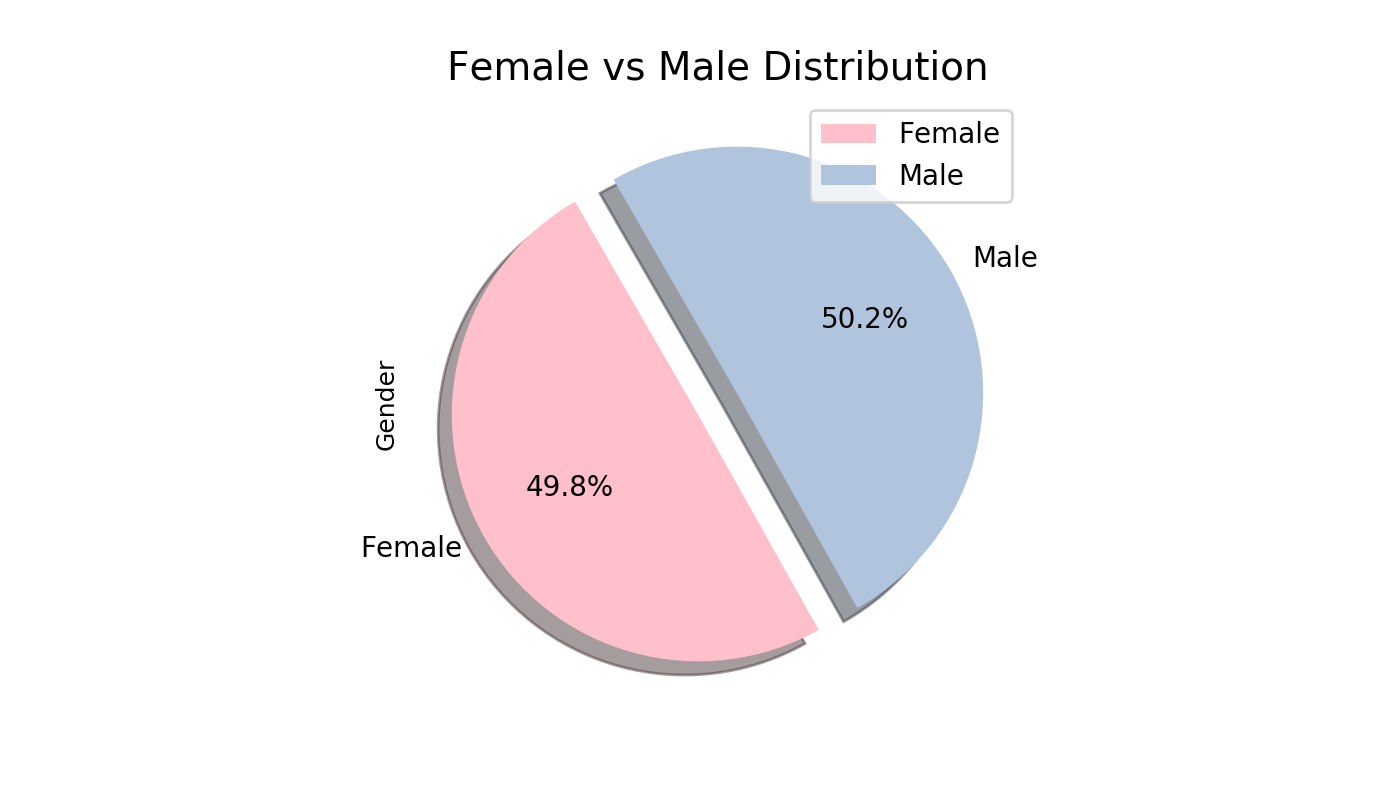

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = merged_data.groupby(["Mouse ID", "Sex"])
grouped_gender 
gender_df = pd.DataFrame(grouped_gender.size())

mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percent of Gender"]=(100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

mouse_gender["Percent of Gender"]=mouse_gender["Percent of Gender"].map("{:,.2f}%".format)

mouse_gender

#pie plot using pandas

colors = ["pink", "lightsteelblue"]
explode = (.09, .09)

pie_plot = mouse_gender.plot.pie(y="Total Count", figsize=(7, 4), colors = colors, startangle=120, explode = explode, shadow=True, autopct="%1.1f%%")

plt.title("Female vs Male Distribution", fontsize=14)
plt.ylabel("Gender", fontsize =9)
plt.show()

<IPython.core.display.Javascript object>


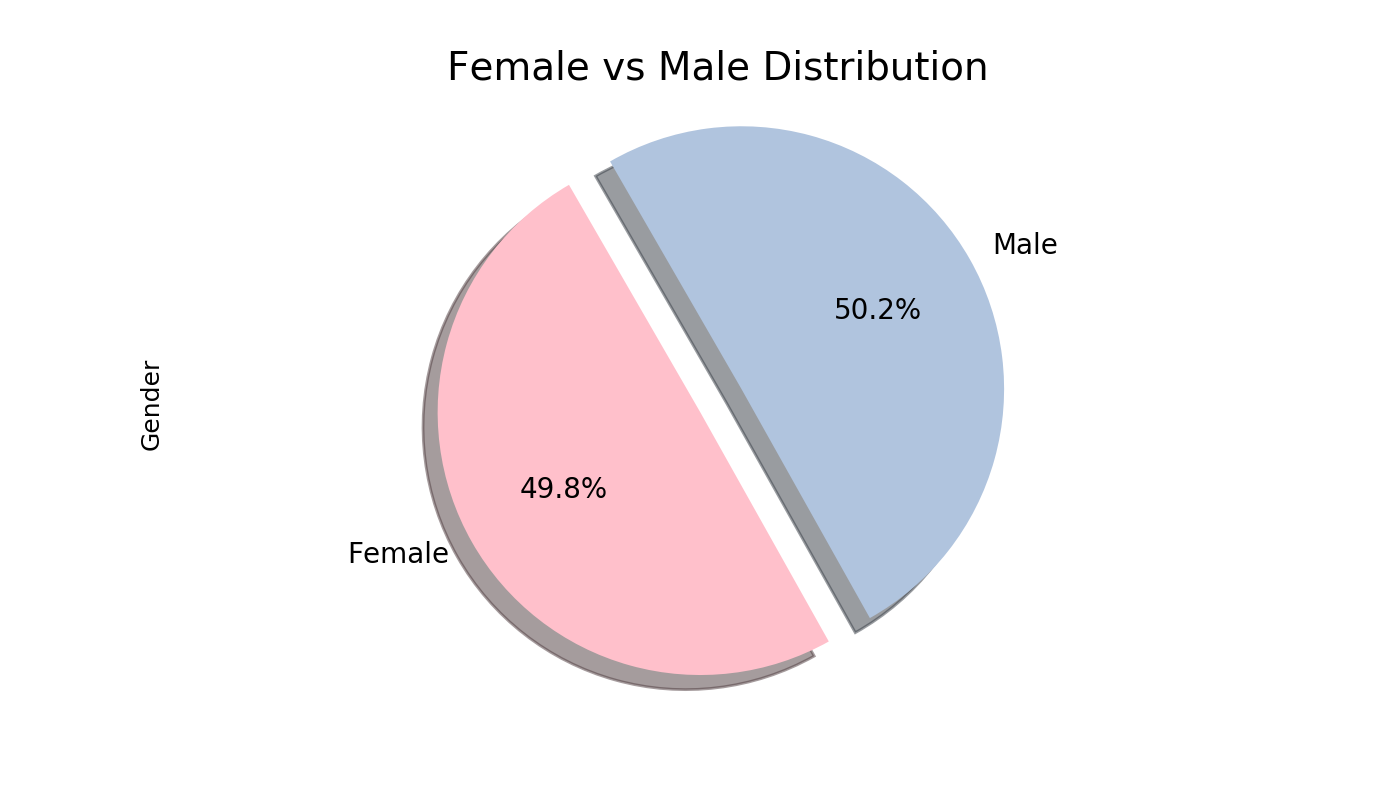

(-1.222433540595792,
 1.1968109222181305,
 -1.1852817256644366,
 1.159754824141141)

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]

sizes = [49.8, 50.2]

colors = ["pink", "lightsteelblue"]

explode = (.09, .09)

fig1, axl = plt.subplots(figsize = (7, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("Female vs Male Distribution", fontsize=14)
plt.ylabel("Gender", fontsize=9)

plt.axis("equal", fontsize =14)

## Quartiles, Outliers and Boxplots

In [158]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cap_df = merged_data.loc[merged_data["Drug Regimen"]=="Capomulin",:]
ram_df = merged_data.loc[merged_data["Drug Regimen"]=="Ramicane",:]
inf_df = merged_data.loc[merged_data["Drug Regimen"]=="Infubinol",:]
ceft_df = merged_data.loc[merged_data["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

cap_last = cap_df.groupby("Mouse ID").max()["Timepoint"]
cap_vol = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_vol, merged_data, on = ("Mouse ID", "Timepoint"), how="left")
cap_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [159]:
cap_tumors = cap_merge["Tumor Volume (mm3)"]

quartiles = cap_tumors.quantile([.25, .5, .75])
q1 = round(quartiles[0.25], 3)
q3 = round(quartiles[0.75], 3)
iqr= round(q3-q1, 3)

print(f"The first quartile of Capomulin tumors is: {q1}.")
print(f"The third quartile Capomulin tumors is: {q3}.")
print(f"The interquartile range of Capomulin tumors is: {iqr}.")

#outlier boundaries 

low_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

print(f"Tumors below {low_bound} are potential outliers.")
print(f"Tumors above {upper_bound} are potential outliers.")


The first quartile of Capomulin tumors is: 32.377.
The third quartile Capomulin tumors is: 40.159.
The interquartile range of Capomulin tumors is: 7.782.
Tumors below 20.704 are potential outliers.
Tumors above 51.832 are potential outliers.


In [160]:
ram_last = ram_df.groupby("Mouse ID").max()["Timepoint"]
ram_vol = pd.DataFrame(ram_last)
ram_merge = pd.merge(ram_vol, merged_data, on = ("Mouse ID", "Timepoint"), how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [161]:
ram_tumors = ram_merge["Tumor Volume (mm3)"]

quartiles = ram_tumors.quantile([.25, .5, .75])
q1 = round(quartiles[0.25], 3)
q3 = round(quartiles[0.75], 3)
iqr= round(q3-q1, 3)

print(f"The first quartile of Ramicane tumors is: {q1}.")
print(f"The third quartile Ramicane tumors is: {q3}.")
print(f"The interquartile range of Ramicane tumors is: {iqr}.")

#outlier boundaries 

low_bound = round(q1 - (1.5*iqr),3)
upper_bound = round(q3 + (1.5*iqr), 2)

print(f"Tumors below {low_bound} are potential outliers.")
print(f"Tumors above {upper_bound} are potential outliers.")


The first quartile of Ramicane tumors is: 31.56.
The third quartile Ramicane tumors is: 40.659.
The interquartile range of Ramicane tumors is: 9.099.
Tumors below 17.911 are potential outliers.
Tumors above 54.31 are potential outliers.


In [162]:
inf_last = inf_df.groupby("Mouse ID").max()["Timepoint"]
inf_vol = pd.DataFrame(inf_last)
inf_merge = pd.merge(inf_vol, merged_data, on = ("Mouse ID", "Timepoint"), how="left")
inf_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [163]:
inf_tumors = inf_merge["Tumor Volume (mm3)"]

quartiles = inf_tumors.quantile([.25, .5, .75])
q1 = round(quartiles[0.25], 3)
q3 = round(quartiles[0.75], 3)
iqr= round(q3-q1, 3)

print(f"The first quartile of Infubinol tumors is: {q1}.")
print(f"The third quartile Infubinol tumors is: {q3}.")
print(f"The interquartile range of Infubinol tumors is: {iqr}.")

#outlier boundaries 

low_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

print(f"Tumors below {low_bound} are potential outliers.")
print(f"Tumors above {upper_bound} are potential outliers.")

The first quartile of Infubinol tumors is: 54.049.
The third quartile Infubinol tumors is: 65.526.
The interquartile range of Infubinol tumors is: 11.477.
Tumors below 36.8335 are potential outliers.
Tumors above 82.7415 are potential outliers.


In [164]:
ceft_last = ceft_df.groupby("Mouse ID").max()["Timepoint"]
ceft_vol = pd.DataFrame(ceft_last)
ceft_merge = pd.merge(ceft_vol, merged_data, on = ("Mouse ID", "Timepoint"), how="left")
ceft_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [165]:
ceft_tumors = ceft_merge["Tumor Volume (mm3)"]

quartiles = ceft_tumors.quantile([.25, .5, .75])
q1 = round(quartiles[0.25], 3)
q3 = round(quartiles[0.75], 3)
iqr= round(q3-q1, 3)

print(f"The first quartile of Ceftamin tumors is: {q1}.")
print(f"The third quartile Ceftamin tumors is: {q3}.")
print(f"The interquartile range of Ceftamin tumors is: {iqr}.")

#outlier boundaries 

low_bound = round(q1 - (1.5*iqr), 3)
upper_bound = q3 + (1.5*iqr)

print(f"Tumors below {low_bound} are potential outliers.")
print(f"Tumors above {upper_bound} are potential outliers.")

The first quartile of Ceftamin tumors is: 48.722.
The third quartile Ceftamin tumors is: 64.3.
The interquartile range of Ceftamin tumors is: 15.578.
Tumors below 25.355 are potential outliers.
Tumors above 87.667 are potential outliers.


<IPython.core.display.Javascript object>


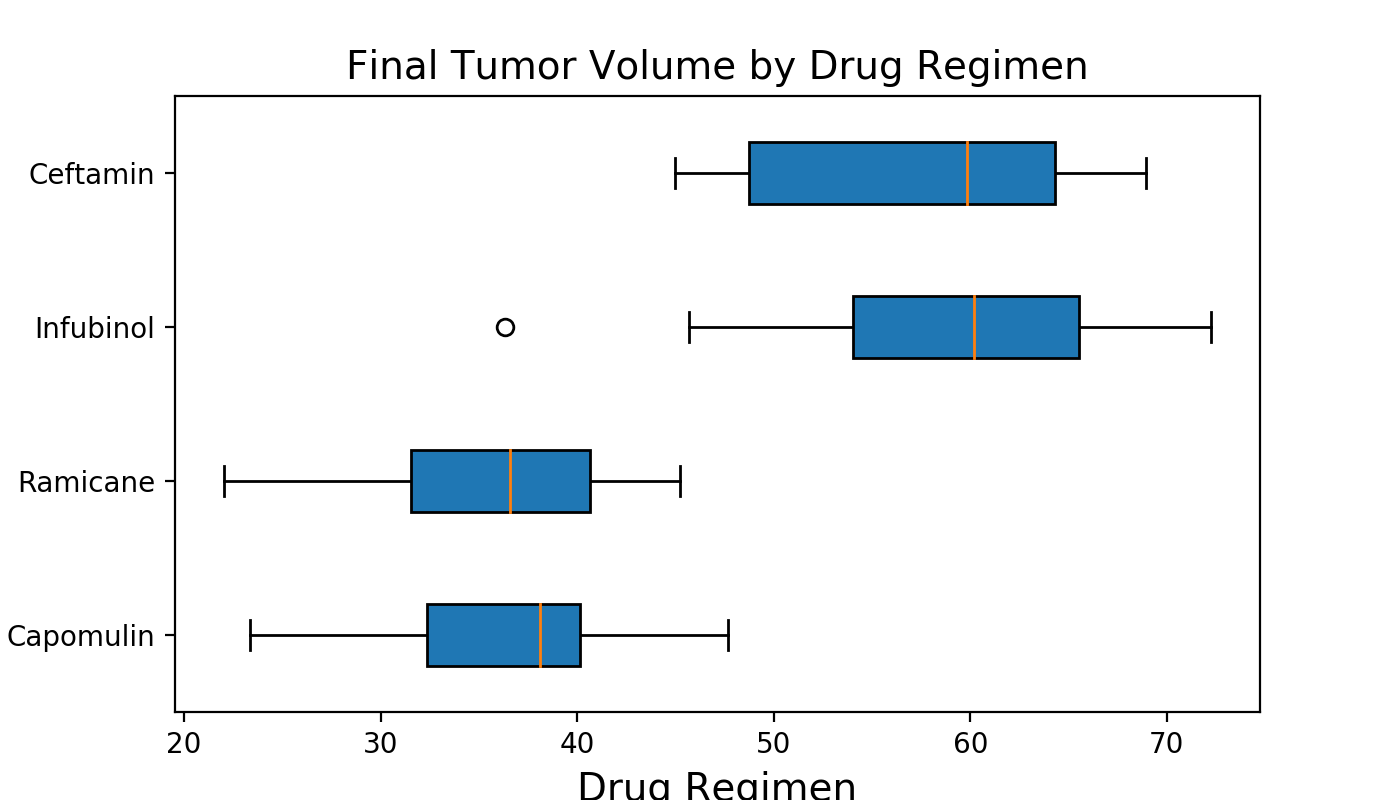

In [166]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = [cap_tumors, ram_tumors, inf_tumors, ceft_tumors]
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1, = plt.subplots(figsize=(7, 4))
ax1.set_title("Final Tumor Volume by Drug Regimen", fontsize=14)
ax1.set_ylabel("Final Tumore Volume (mm3)", fontsize=14)
ax1.set_xlabel("Drug Regimen", fontsize=14)
ax1.boxplot(box_plot, labels=drug_regimen, widths = .4, patch_artist=True, vert=False)


 
plt.show()

## Line and Scatter Plots

In [167]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = cap_df.loc[cap_df["Mouse ID"]=="b742",:]
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


<IPython.core.display.Javascript object>


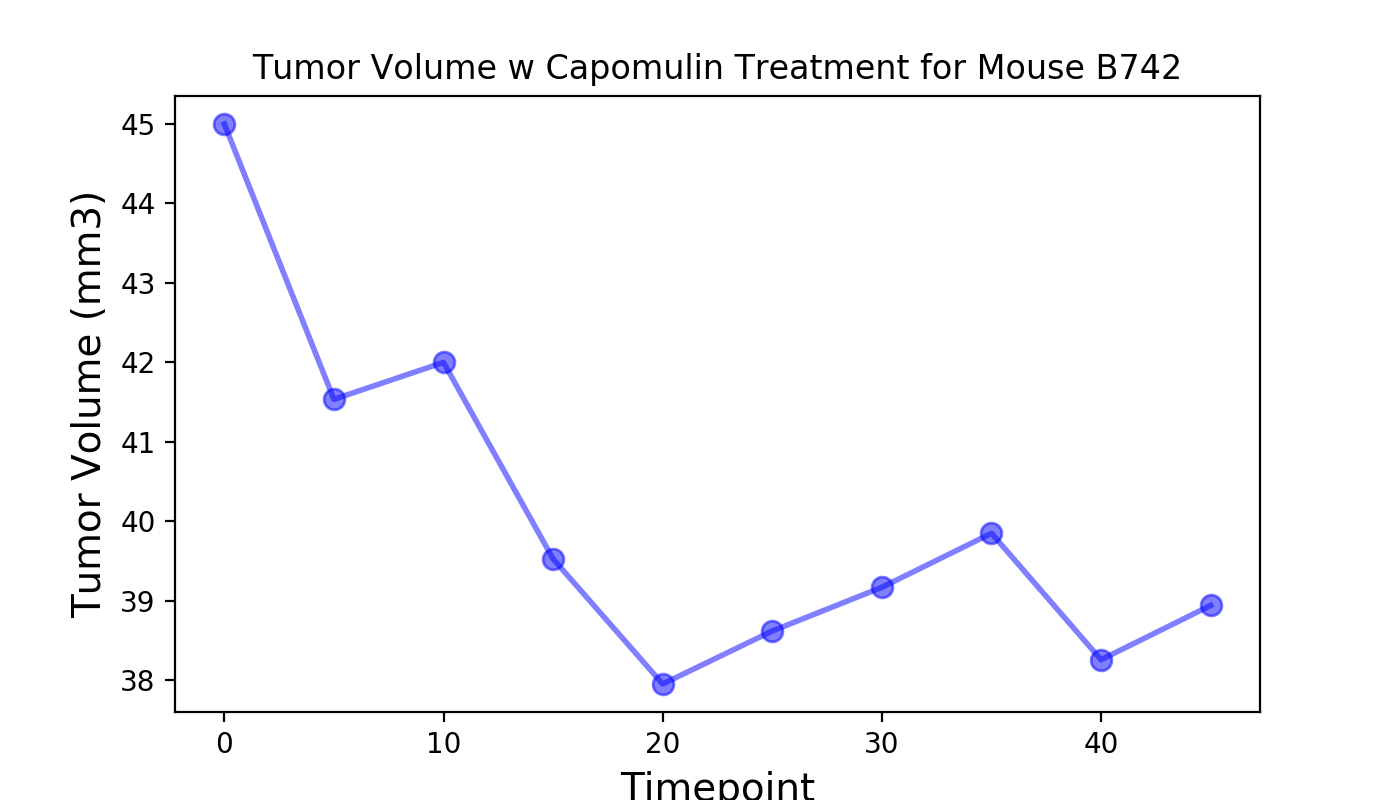

In [168]:
#line graph for Capomulin

x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize = (7, 4))
plt.title("Tumor Volume w Capomulin Treatment for Mouse B742")
plt.plot(x_axis, tumor_size, linewidth= 2, markersize=15, marker=".", color="blue", alpha=0.5)

plt.xlabel("Timepoint", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)

plt.show()

<IPython.core.display.Javascript object>


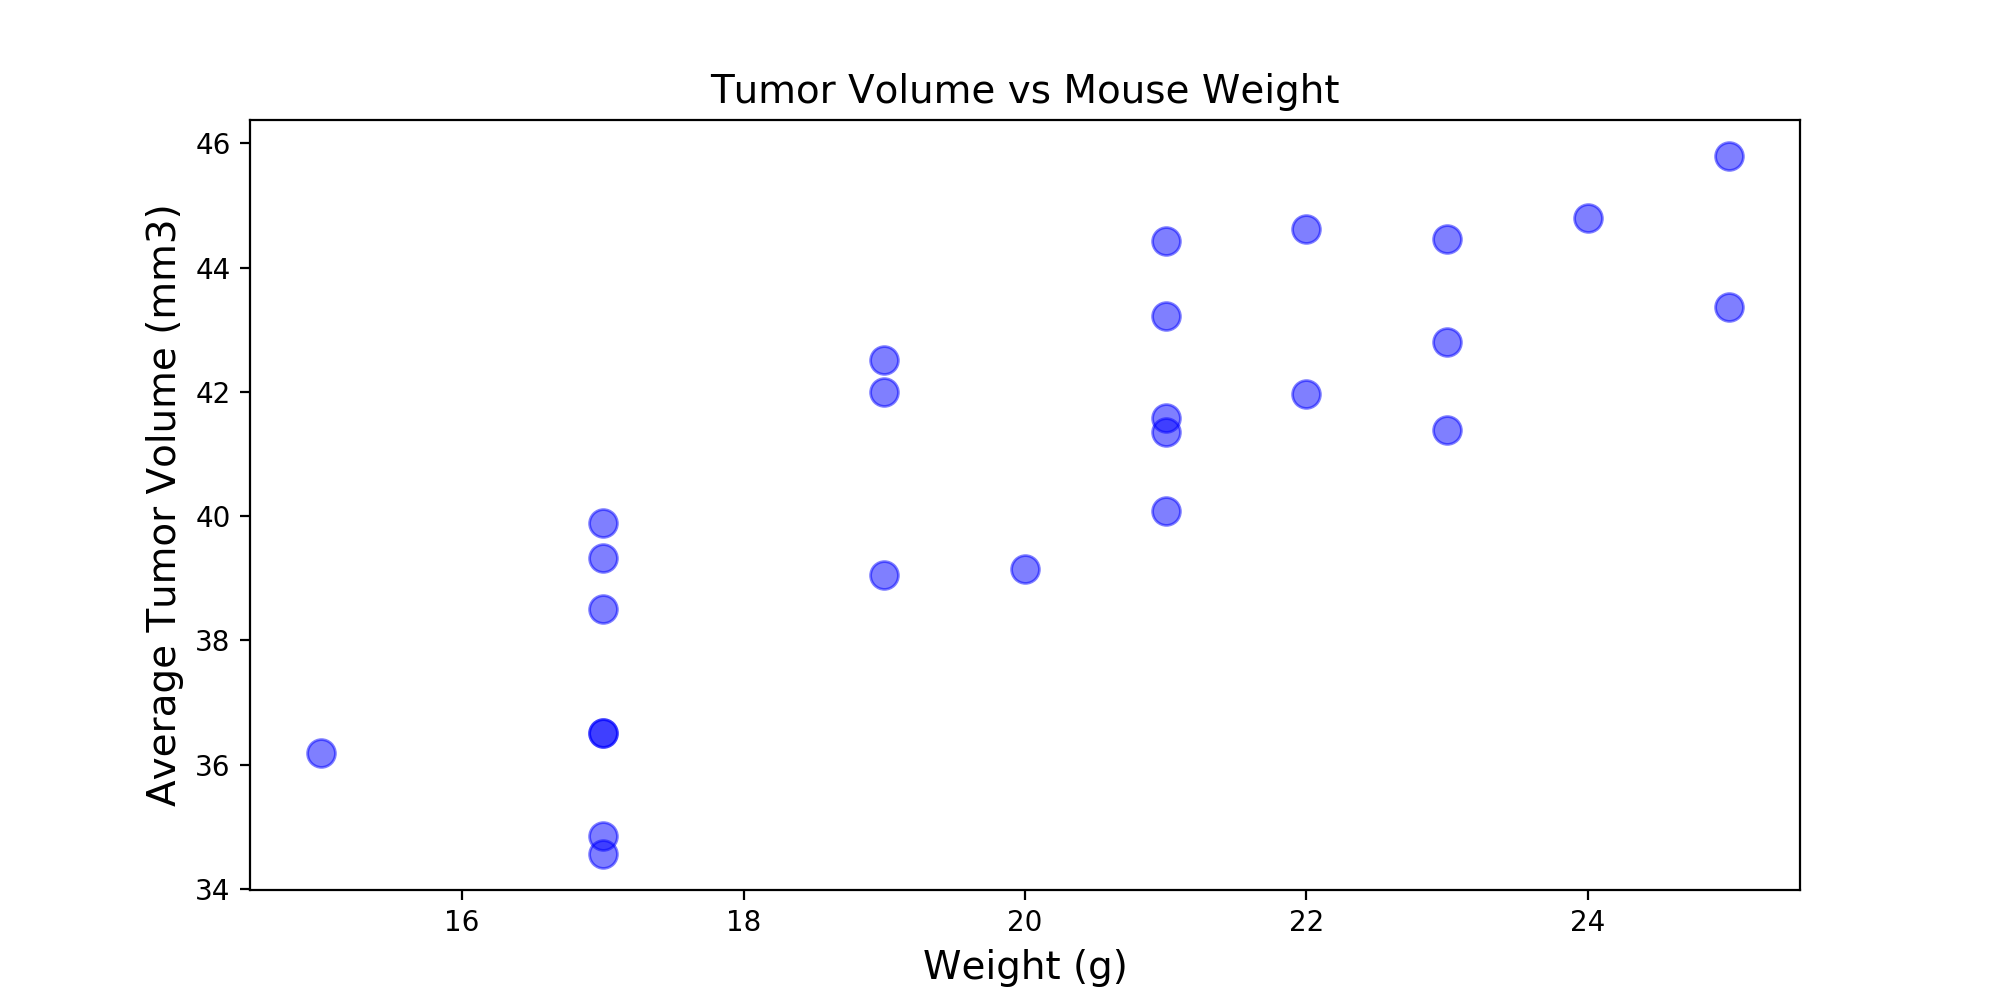

In [175]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(10,5))
avg_tumor_vol = cap_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"], s=100, color="blue", alpha=.5)
plt.title("Tumor Volume vs Mouse Weight", fontsize=14)
plt.xlabel("Weight (g)", fontsize=14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=14)
plt.show()

## Correlation and Regression

In [170]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
r = round(st.pearsonr(avg_tumor_vol["Weight (g)"], avg_tumor_vol["Tumor Volume (mm3)"])[0], 2)

print(f"The correlation coefficient, r, between average tumor volume and mouse weight is approximately {r}.")

The correlation coefficient, r, between average tumor volume and mouse weight is approximately 0.84.


In [174]:
x_values = avg_tumor_vol["Weight (g)"]
y_values = avg_tumor_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))


line_eq

'y = 0.95x + 21.55'